## Telecom Churn Case Study - Ganesh Nagappa Shetty
We have a telecom firm which has collected data of all its customers. The main types of attributes are:

Demographics (age, gender etc.)
Services availed (internet packs purchased, special offers taken etc.)
Expenses (amount of recharge done per month etc.)

Based on all this past information, we want to build a model which will predict whether a particular customer will churn or not, i.e. whether they will switch to a different service provider or not. So the variable of interest, i.e. the target variable here is `churn` which will tell us whether or not a particular customer has churned. It is a binary variable - 1 means that the customer has churned and 0 means the customer has not churned.

With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not.

## 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Necessary Libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Importing Churn data
churn_data=pd.read_csv('churn_data.csv')

# Importing Customer data
customer_data=pd.read_csv('customer_data.csv')

# Importing Internet data
internet_data=pd.read_csv('internet_data.csv')

In [3]:
# First few lines of Churn data
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# First few lines of Customer data
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
# First few lines of Internet data
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


We can see that above all 3 dataframes have common variable in `customerID`. We can merge them into single dataframe using `customerID`

In [6]:
# Merging of Churn data and Customer data into a single Dataframe
df=pd.merge(churn_data,customer_data,how='inner',on='customerID')

# Merging Internet data into the combined Dataframe
df=pd.merge(df,internet_data,how='inner',on='customerID')

## 2: Inspecting and Merging Data

In [7]:
#First few lines of dataset
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [8]:
# Dimentions of the data
df.shape

(7043, 21)

In [9]:
# Lets check the types of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


**Observation:** There are no null values in the data. However when we see data types, many variables have 'yes'/'no' binary entries which need to be converted to 1/0. We will do this after visualization. However we can see that TotalCharges should be a numerical variable which needs to be converted.

In [10]:
#Converting TotslChanges variable to numeric
df.TotalCharges=pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges.dtype

dtype('float64')

In [11]:
# Statistical summary of the data
df.describe(percentiles=[.1,.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.162147
std,24.559481,30.090047,2266.771362,0.368612
min,0.000000,18.250000,18.800000,0.000000
10%,2.000000,20.050000,84.600000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,0.000000
90%,69.000000,102.600000,5976.640000,1.000000
95%,72.000000,107.400000,6923.590000,1.000000


**Observation:** There seem to be no outliers in the numerical data. They look like continuously increasing values from minimum to maximum

In [12]:
# Lets Check the missing values again
df.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

In [13]:
# % of missing value in TotalCharges
df.TotalCharges.isnull().sum()*100/df.shape[0]

0.15618344455487718

Since there are only 0.15% of the TotalCharges data is missing we can drop those entries as it will not have considerable impact on our model

In [14]:
# Dropping entries with null values in TotalCharges
df=df[~df.TotalCharges.isnull()]

In [15]:
df.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Now we have data which is free of Outliers and Missing values lets visualize data.

## 3: Data Visualization

In [16]:
df.columns[df.dtypes=='object']

Index(['customerID', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn', 'gender', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

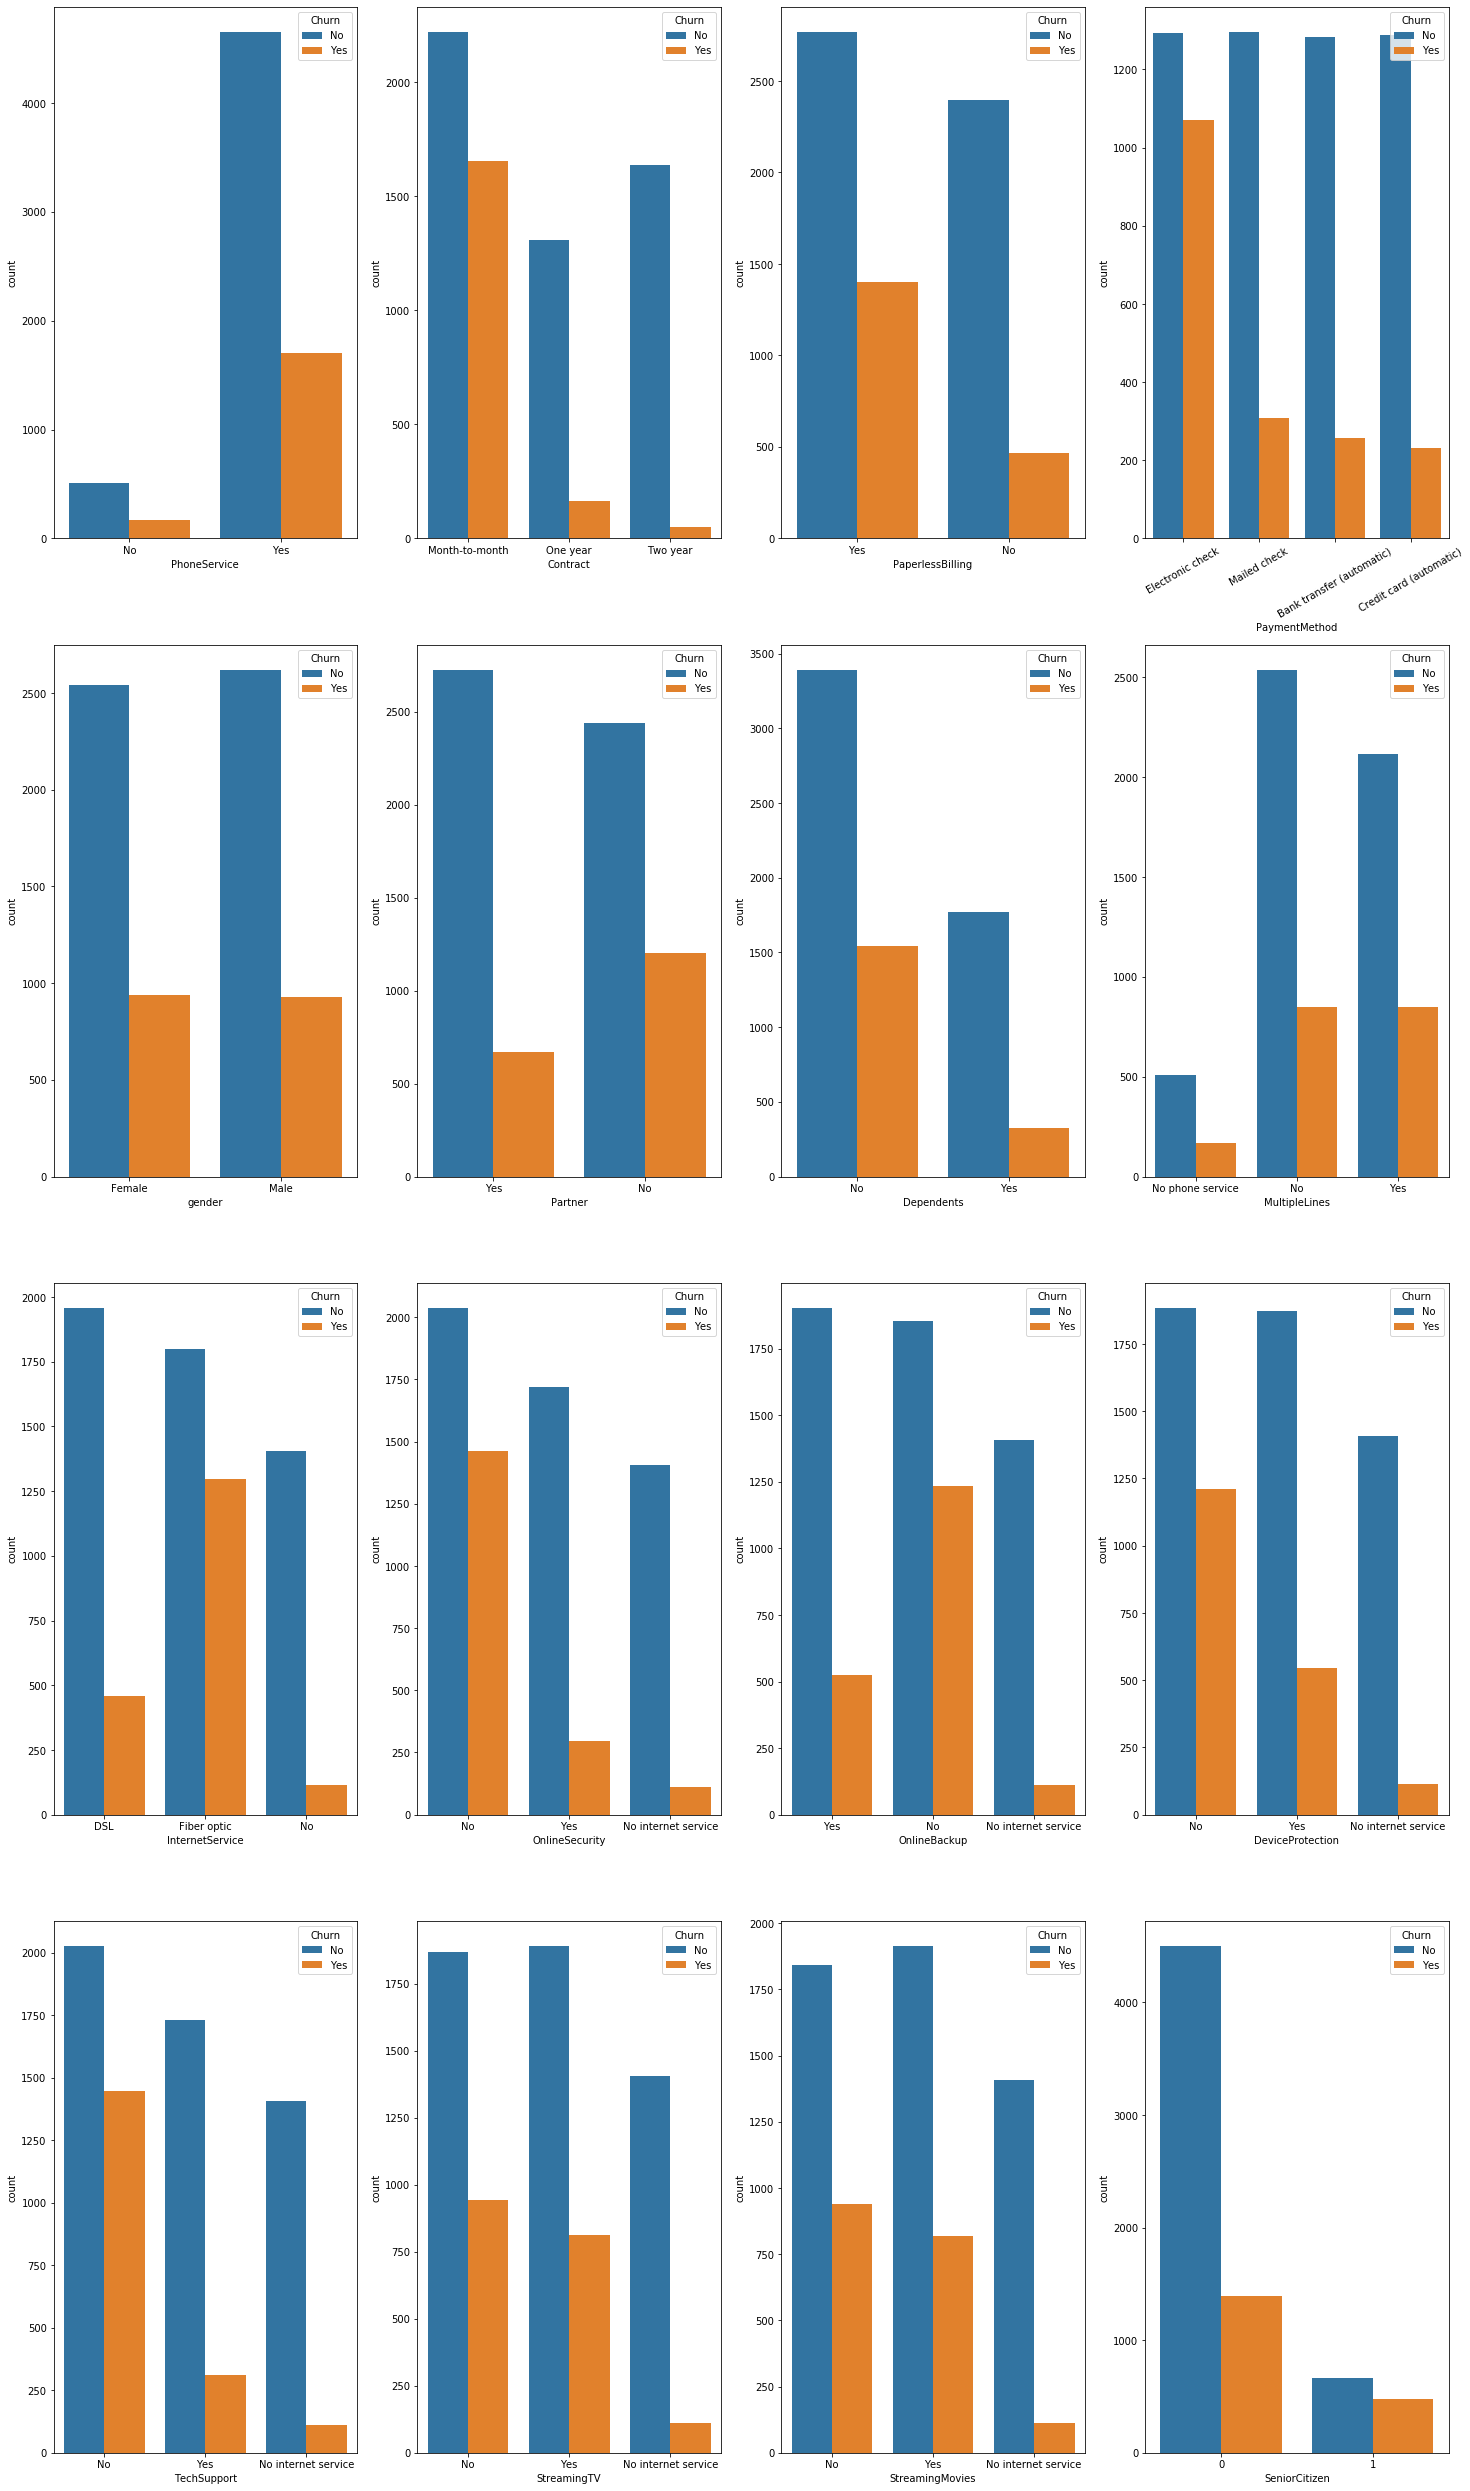

In [17]:
# Lets Visualize Categorical Variables
plt.figure(figsize=(25,45))
plt.subplot(441)
sns.countplot(x='PhoneService',data=df,hue='Churn')
plt.subplot(442)
sns.countplot(x='Contract',data=df,hue='Churn')
plt.subplot(443)
sns.countplot(x='PaperlessBilling',data=df,hue='Churn')
plt.subplot(444)
sns.countplot(x='PaymentMethod',data=df,hue='Churn')
plt.xticks(rotation=30)
plt.subplot(445)
sns.countplot(x='gender',data=df,hue='Churn')
plt.subplot(446)
sns.countplot(x='Partner',data=df,hue='Churn')
plt.subplot(447)
sns.countplot(x='Dependents',data=df,hue='Churn')
plt.subplot(448)
sns.countplot(x='MultipleLines',data=df,hue='Churn')
plt.subplot(449)
sns.countplot(x='InternetService',data=df,hue='Churn')
plt.subplot(4,4,10)
sns.countplot(x='OnlineSecurity',data=df,hue='Churn')
plt.subplot(4,4,11)
sns.countplot(x='OnlineBackup',data=df,hue='Churn')
plt.subplot(4,4,12)
sns.countplot(x='DeviceProtection',data=df,hue='Churn')
plt.subplot(4,4,13)
sns.countplot(x='TechSupport',data=df,hue='Churn')
plt.subplot(4,4,14)
sns.countplot(x='StreamingTV',data=df,hue='Churn')
plt.subplot(4,4,15)
sns.countplot(x='StreamingMovies',data=df,hue='Churn')
plt.subplot(4,4,16)
sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
plt.show()

### Insights:
**PhoneService:** Most of the people have opted for phone service. However this doesn't throw much insights into the customer churning
<br>**Contract:** People opting for Month-to-Month contract are more likely to churn compared to the customers with longer contracts. With increase in duration of contract churn rate is going down
<br>**PaperlessBilling:** More customers are opting for Paperless Billing and they are also churning more than the people with paper billing
<br>**PaymentMethod:** People with Electronic Check are most likely to churn
<br>**gender:** Gender doesn't throw any significant insights into customer churning. Irrespective of genders behaviour is similar
<br>**Partners:** People not having partners(Spouces or Live-in partner) are more likely to churn
<br>**Dependents:** People without any dependents are more likely to churn
<br>**MultipleLines:** The rate of churning is more in people having multiple lines
<br>**InternetService:** Customers with FibreOptic connections are highly likely to churn
<br>**OnlineSecurity:** People without Online security are most likely to churn
<br>**OnlineBackup:** Customers without Online Backup are most likely to churn
<br>**DeviceProtection:** People who haven't opted for Device protection are most likely to churn
<br>**Techsupport:** Customers who haven't opted for Tech Supporty are most likely to churn
<br>**StreamingTV:** People who haven't opted for TV Streaming have slightly more chances of churning 
<br>**StreamingMovies:** People who haven't opted for Movie Streaming have slightly more chances of churning
<br>**SeniorCitizen:** Though number of Senior citizens is very less compared to younger generation, they are more likely to churn

**Observation:** Variables such as `OnlineSecurity`, `OnlineBackup`,`DeviceProtection`, `TechSupport`, `StreamingTV` and `StreamingMovies` have one common data which is `No Internet connection`. However, this information is already represented in another variable `InternetService`. We will look into this later in Data Preparation. Similar phenamenon is observed in `PhoneService` & `MultipleLines`

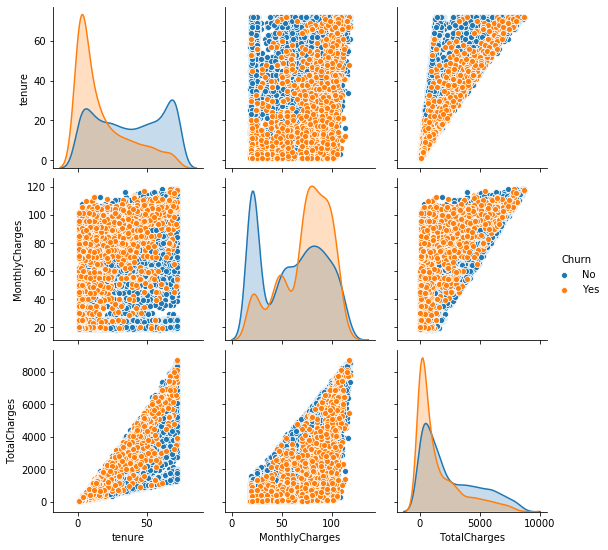

In [18]:
# Lets explore the Numerical Data
temp=df[['tenure', 'MonthlyCharges', 'TotalCharges','Churn']]
sns.pairplot(data= temp,hue='Churn')
plt.show()

### Insights:
- People with higher Total Charges are slightly more likely to churn
- There exists linear relationship between `TotalCharges` with `tenure` and `MonthlyCharges`. We will explore this further when we deal with multicolinearity

## 4: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [19]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
df[varlist]=df[varlist].apply(lambda x: x.map({'Yes': 1, "No": 0}))
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [20]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

# Dropping variables for which dummies are created
df = df.drop(['Contract', 'PaymentMethod', 'gender', 'InternetService'], 1)

df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,No,No,0,0,0,1,0,0,1,0


In [21]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(df['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(df['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,sm1], axis=1)

# Dropping variables for which dummies are created
df = df.drop(['MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [22]:
# Lets drop unwated customerID variable
df.drop('customerID',axis=1,inplace=True)
df.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,1,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,0,1,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


## 5: Checking Correlations

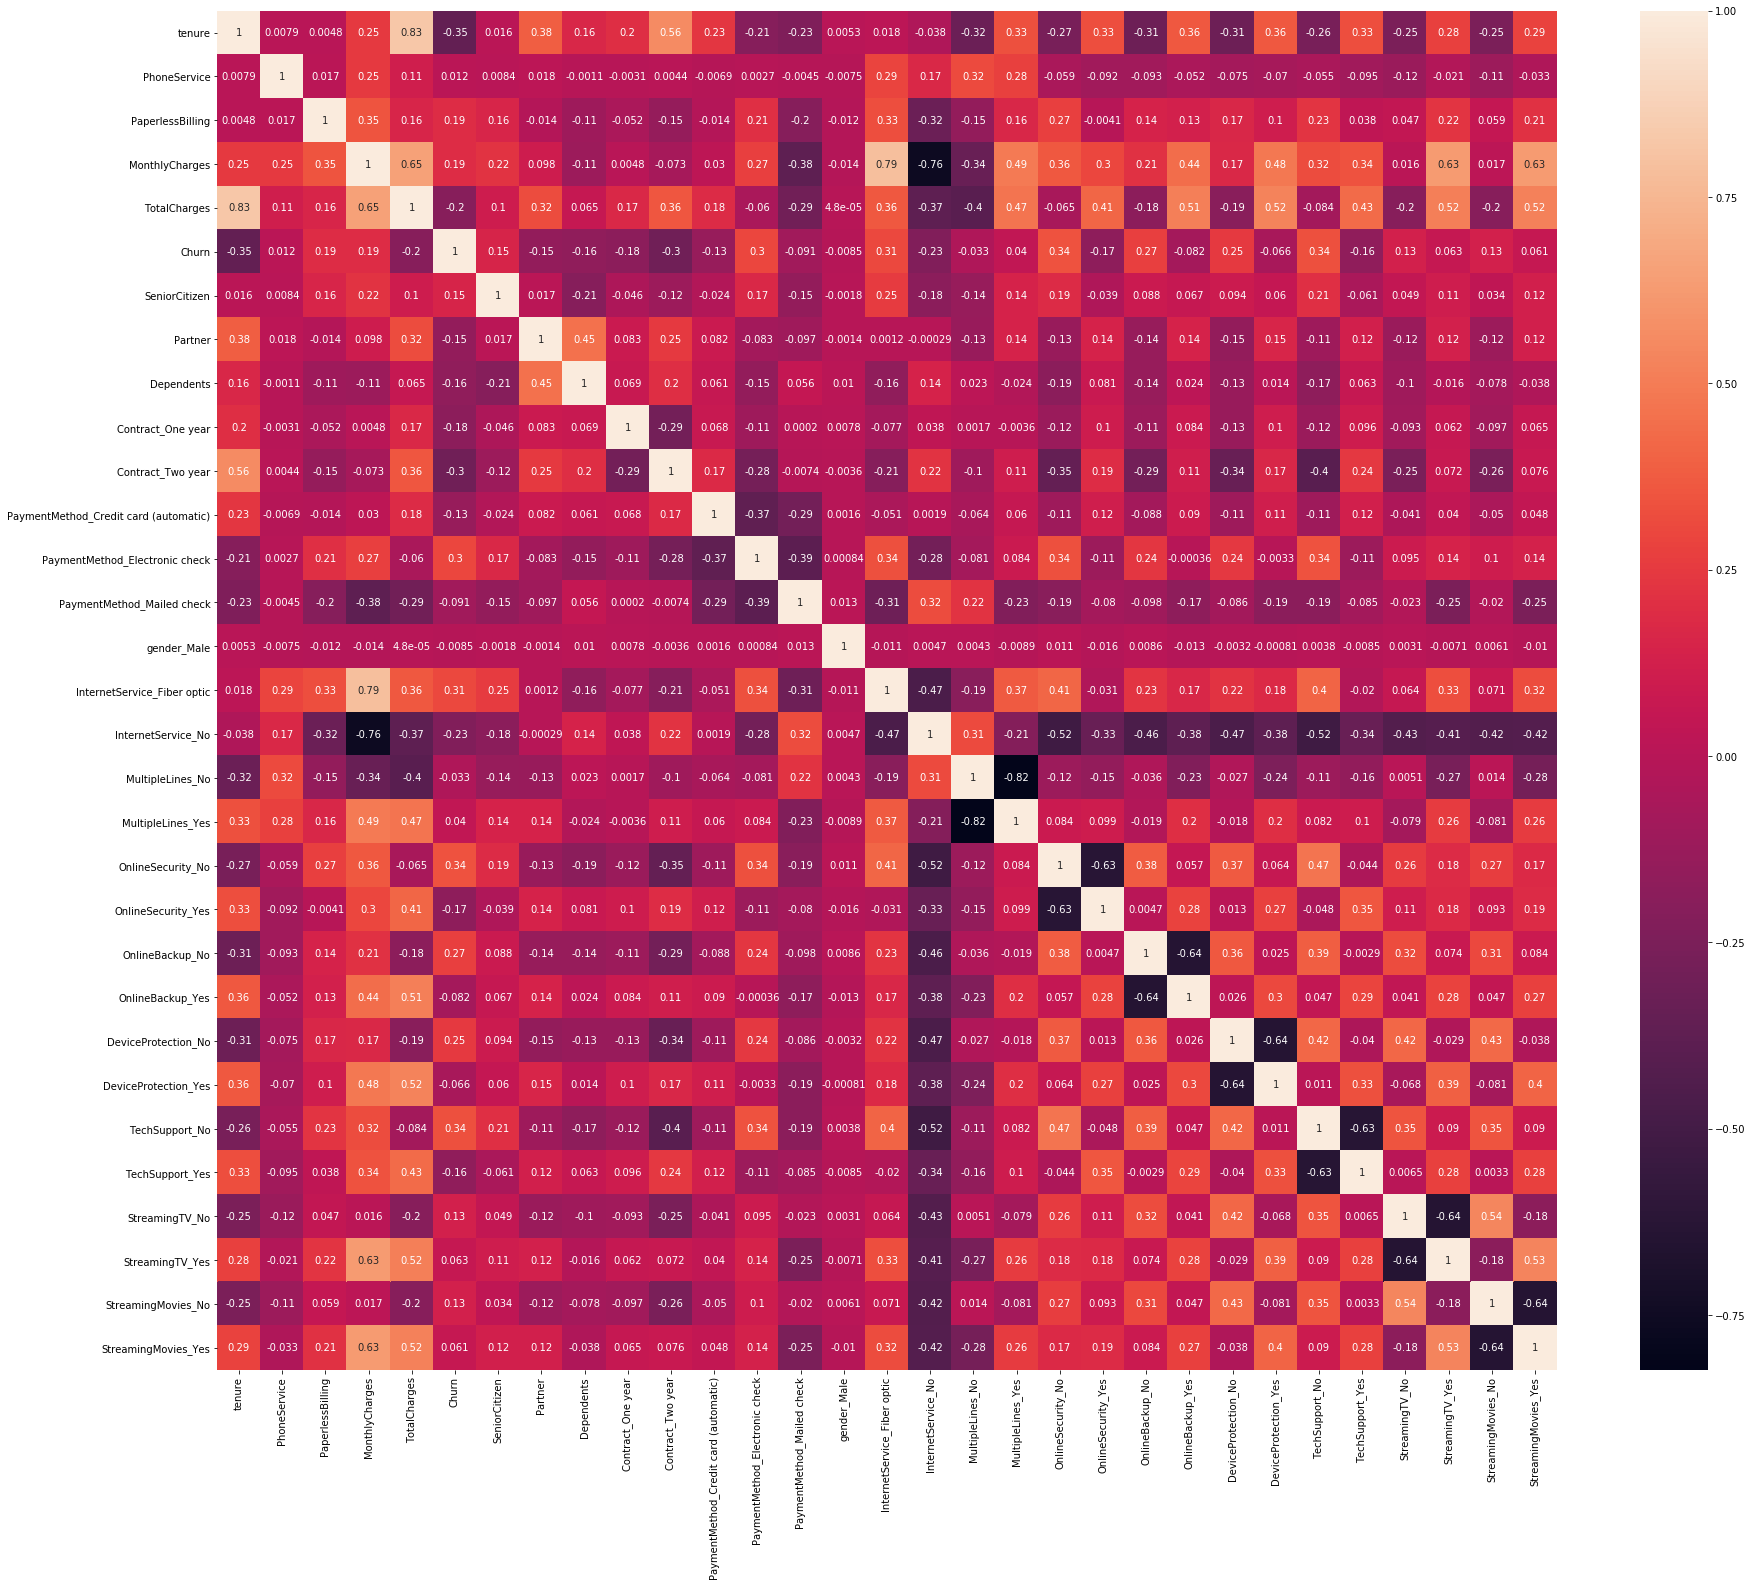

In [23]:
# Let's see the correlation matrix 
fig,ax= plt.subplots()
fig.set_size_inches(30,25)
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Dropping highly correlated dummy variables

In [24]:
df = df.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
              'StreamingTV_No','StreamingMovies_No'], 1)

We can also see that 'MonthlyCharges' has high correlations with many variables. Lets drop this variable

In [25]:
df.drop('MonthlyCharges',axis=1,inplace=True)

After dropping highly correlated variables now let's check the correlation matrix again.

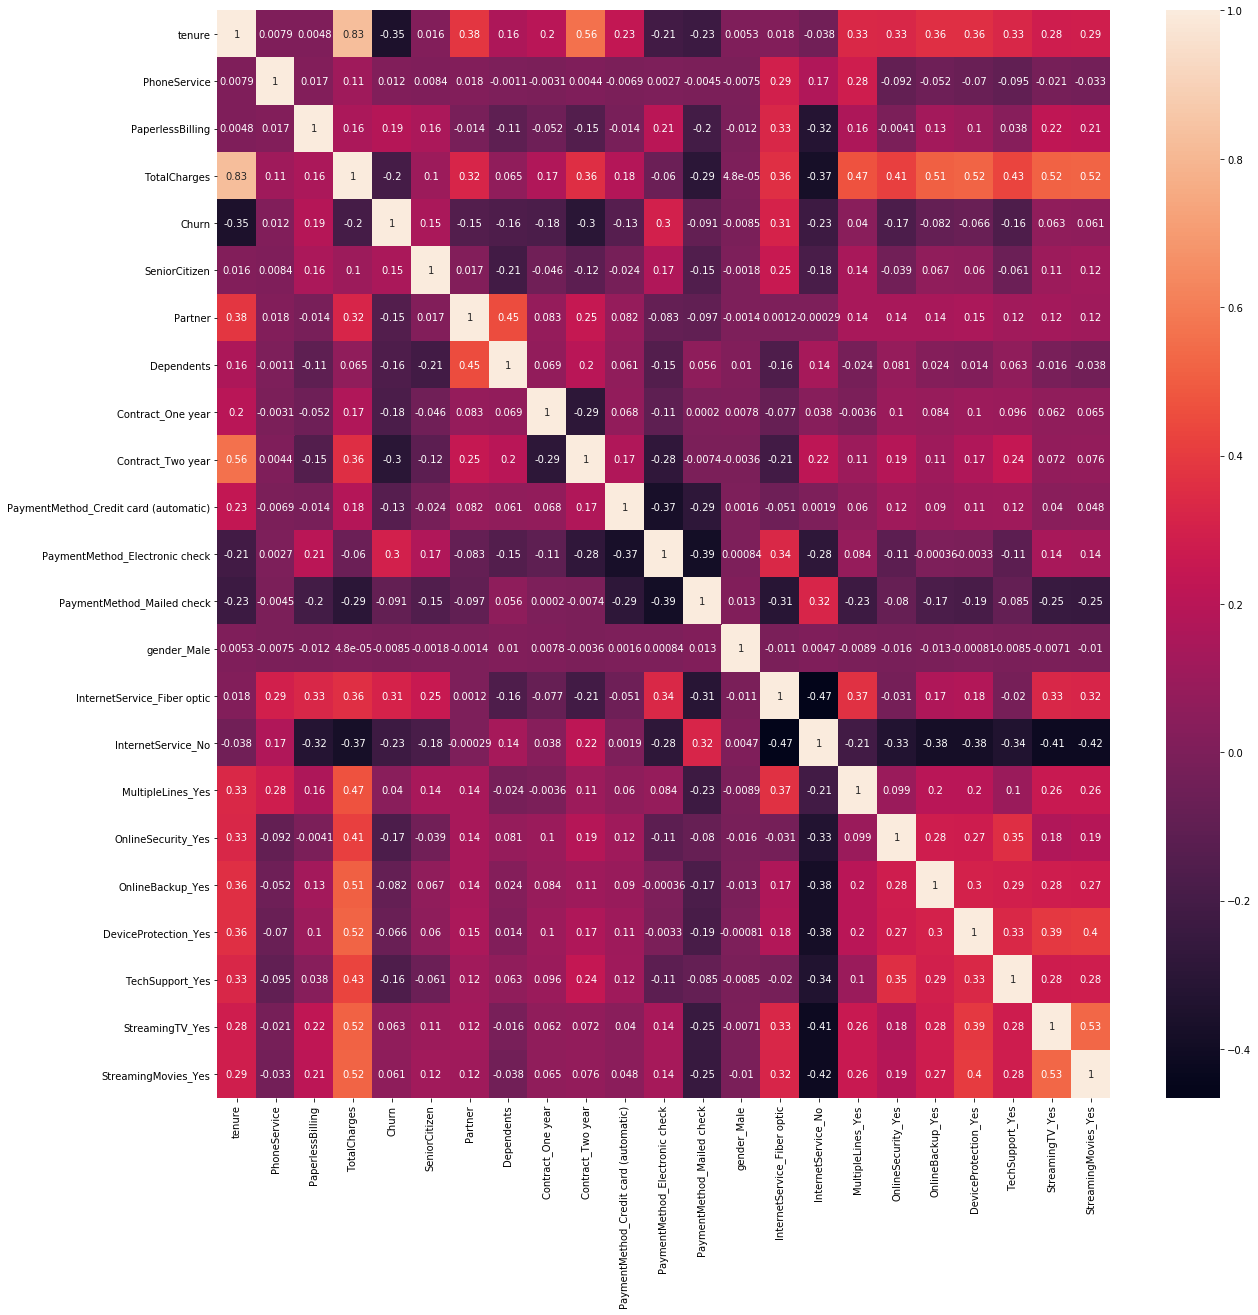

In [26]:
fig,ax= plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(df.corr(),annot=True)
plt.show()

We see some more correlations between variables. Lets explore this during Feature Elimination

## 6: Splitting data into Test-Train datasets

In [27]:
from sklearn.model_selection import train_test_split

# Creation of feature(X) and response(y) datasets
X = df.drop(['Churn'], axis=1)
y = df['Churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 7: Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['tenure','TotalCharges']] = scaler.fit_transform(X_train[['tenure','TotalCharges']])
X_test[['tenure','TotalCharges']] = scaler.transform(X_test[['tenure','TotalCharges']])

In [29]:
### Checking the Churn Rate
churn = (sum(df['Churn'])/len(df['Churn'].index))*100
churn

26.578498293515356

We have almost 27% Churn rate

## 8: Model Building

#### Running First Training Model

In [30]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2006.5
Date:                Sun, 24 Jan 2021   Deviance:                       4012.9
Time:                        12:58:46   Pearson chi2:                 6.09e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0592      0.209     -5.057      0.000      -1.470      -0.649
tenure                                   -1.4937      0.188     -7.943      0.000      -1.862      -1.125
PhoneService                             -0.5008      0.163     -3.079      0.002      -0.820      -0.182
PaperlessBilling                          0.3294      0.090      3.659      0.000       0.153       0.506
TotalCharges                              0.7060      0.197      3.592      0.000       0.321       1.091
SeniorCitizen                             0.3932      0.101      3.876      0.000       0.194       0.592
Partner                                   0.0436      0.094      0.466      0.641      -0.140       0.227
Dependents                               -0.1477      0.107     -1.378      0.168      -0.358       0.062
Contract_One year                        -0.6642      0.129     -5.158      0.000      -0.917      -0.412
Contract_Two year                        -1.2427      0.212     -5.862      0.000      -1.658      -0.827
PaymentMethod_Credit card (automatic)    -0.2573      0.137     -1.881      0.060      -0.525       0.011
PaymentMethod_Electronic check            0.1620      0.113      1.439      0.150      -0.059       0.383
PaymentMethod_Mailed check               -0.2503      0.137     -1.822      0.068      -0.520       0.019
gender_Male                              -0.0355      0.078     -0.454      0.650      -0.189       0.118
InternetService_Fiber optic               0.7094      0.118      6.005      0.000       0.478       0.941
InternetService_No                       -0.9607      0.169     -5.701      0.000      -1.291      -0.630
MultipleLines_Yes                         0.2029      0.096      2.117      0.034       0.015       0.391
OnlineSecurity_Yes                       -0.3827      0.103     -3.728      0.000      -0.584      -0.181
OnlineBackup_Yes                         -0.1840      0.093     -1.984      0.047      -0.366      -0.002
DeviceProtection_Yes                     -0.0401      0.095     -0.422      0.673      -0.226       0.146
TechSupport_Yes                          -0.3896      0.102     -3.813      0.000      -0.590      -0.189
StreamingTV_Yes                           0.2385      0.098      2.441      0.015       0.047       0.430
StreamingMovies_Yes                       0.1272      0.097      1.306      0.191      -0.064       0.318
=========================================================================================================
"""

Lets use Recursive Feature Elimination (RFE) to select top 15 features and thereafter we can explore the possibility of further feature elimination manually based on p-values(significance of features) and VIFs(Multicolinearity)

## 9: Feature Selection Using RFE

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
# running RFE with 15 variables as output
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 6),
 ('Dependents', False, 5),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 3),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 2),
 ('DeviceProtection_Yes', False, 7),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', False, 4)]

In [32]:
# Selected Variables
col = X_train.columns[rfe.support_]

# Eliminated Variables
X_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'PaymentMethod_Electronic check',
       'gender_Male', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [33]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.8
Date:                Sun, 24 Jan 2021   Deviance:                       4023.5
Time:                        12:58:47   Pearson chi2:                 6.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0343      0.171     -6.053      0.000      -1.369      -0.699
tenure                                   -1.5386      0.184     -8.381      0.000      -1.898      -1.179
PhoneService                             -0.5231      0.161     -3.256      0.001      -0.838      -0.208
PaperlessBilling                          0.3397      0.090      3.789      0.000       0.164       0.515
TotalCharges                              0.7116      0.188      3.794      0.000       0.344       1.079
SeniorCitizen                             0.4294      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6813      0.128     -5.334      0.000      -0.932      -0.431
Contract_Two year                        -1.2680      0.211     -6.011      0.000      -1.681      -0.855
PaymentMethod_Credit card (automatic)    -0.3775      0.113     -3.352      0.001      -0.598      -0.157
PaymentMethod_Mailed check               -0.3760      0.111     -3.389      0.001      -0.594      -0.159
InternetService_Fiber optic               0.7421      0.117      6.317      0.000       0.512       0.972
InternetService_No                       -0.9385      0.166     -5.650      0.000      -1.264      -0.613
MultipleLines_Yes                         0.2086      0.096      2.181      0.029       0.021       0.396
OnlineSecurity_Yes                       -0.4049      0.102     -3.968      0.000      -0.605      -0.205
TechSupport_Yes                          -0.3967      0.102     -3.902      0.000      -0.596      -0.197
StreamingTV_Yes                           0.2747      0.094      2.911      0.004       0.090       0.460
=========================================================================================================
"""

**Observation:** All variables are significant as they have p-values less than 0.03. Lets now check the accuracy of this model before proceeding with further feature eliminations

##### Creating a dataframe with the actual churn flag, predicted probabilities and predicted churn flag

In [34]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})

#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.225111,0
1,0,0.274893,0
2,1,0.692126,1
3,1,0.504909,1
4,1,0.645261,1


##### Lets check the Confusion matrix and accuracy for this prediction

In [35]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3270  365]
 [ 579  708]]


In [36]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8082080455099553


**Observation:** Our model is 80.8% accurate however, we do not have balanced dataset. We have a churn rate of 27%. We need other metrics the check the model. Lets now continue with feature elimination and explore other evaluation metrics once the model is ready

#### Checking VIFs

In [37]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,8.86
3,TotalCharges,7.37
0,tenure,6.88
9,InternetService_Fiber optic,3.97
6,Contract_Two year,3.28
10,InternetService_No,3.25
2,PaperlessBilling,2.68
11,MultipleLines_Yes,2.53
14,StreamingTV_Yes,2.34
13,TechSupport_Yes,2.08


There are a few variables with high VIF. There is some more multicolinearity present in the data. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [38]:
col = col.drop('PhoneService', 1)

In [39]:
#Lets rebuild the model

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2017.0
Date:                Sun, 24 Jan 2021   Deviance:                       4034.0
Time:                        12:58:48   Pearson chi2:                 5.94e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3885      0.133    -10.437      0.000      -1.649      -1.128
tenure                                   -1.4138      0.179     -7.884      0.000      -1.765      -1.062
PaperlessBilling                          0.3425      0.089      3.829      0.000       0.167       0.518
TotalCharges                              0.5936      0.184      3.225      0.001       0.233       0.954
SeniorCitizen                             0.4457      0.099      4.486      0.000       0.251       0.640
Contract_One year                        -0.6905      0.128     -5.411      0.000      -0.941      -0.440
Contract_Two year                        -1.2646      0.211     -6.002      0.000      -1.678      -0.852
PaymentMethod_Credit card (automatic)    -0.3785      0.113     -3.363      0.001      -0.599      -0.158
PaymentMethod_Mailed check               -0.3769      0.111     -3.407      0.001      -0.594      -0.160
InternetService_Fiber optic               0.6241      0.111      5.645      0.000       0.407       0.841
InternetService_No                       -1.0940      0.158     -6.919      0.000      -1.404      -0.784
MultipleLines_Yes                         0.1607      0.094      1.712      0.087      -0.023       0.345
OnlineSecurity_Yes                       -0.4094      0.102     -4.016      0.000      -0.609      -0.210
TechSupport_Yes                          -0.4085      0.101     -4.025      0.000      -0.607      -0.210
StreamingTV_Yes                           0.3077      0.094      3.277      0.001       0.124       0.492
=========================================================================================================
"""

Lets Check the accuracy again

In [40]:
#Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})

#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8051605038602194


**Observation:** After dropping the So the 'PhoneService' variable overall accuracy hasn't dropped much

##### Let's check the VIFs again

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.30
0,tenure,6.79
5,Contract_Two year,3.16
8,InternetService_Fiber optic,2.94
9,InternetService_No,2.53
1,PaperlessBilling,2.52
13,StreamingTV_Yes,2.31
10,MultipleLines_Yes,2.27
12,TechSupport_Yes,2.00
4,Contract_One year,1.83


Lets drop TotalCharges variable(With higher VIF) and rebuild the model.

In [42]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')

In [43]:
#Lets rebuild the model

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2022.5
Date:                Sun, 24 Jan 2021   Deviance:                       4044.9
Time:                        12:58:48   Pearson chi2:                 5.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4695      0.130    -11.336      0.000      -1.724      -1.215
tenure                                   -0.8857      0.065    -13.553      0.000      -1.014      -0.758
PaperlessBilling                          0.3367      0.089      3.770      0.000       0.162       0.512
SeniorCitizen                             0.4517      0.100      4.527      0.000       0.256       0.647
Contract_One year                        -0.6792      0.127     -5.360      0.000      -0.927      -0.431
Contract_Two year                        -1.2308      0.208     -5.903      0.000      -1.639      -0.822
PaymentMethod_Credit card (automatic)    -0.3827      0.113     -3.399      0.001      -0.603      -0.162
PaymentMethod_Mailed check               -0.3393      0.110     -3.094      0.002      -0.554      -0.124
InternetService_Fiber optic               0.7914      0.098      8.109      0.000       0.600       0.983
InternetService_No                       -1.1205      0.157     -7.127      0.000      -1.429      -0.812
MultipleLines_Yes                         0.2166      0.092      2.355      0.019       0.036       0.397
OnlineSecurity_Yes                       -0.3739      0.101     -3.684      0.000      -0.573      -0.175
TechSupport_Yes                          -0.3611      0.101     -3.591      0.000      -0.558      -0.164
StreamingTV_Yes                           0.3995      0.089      4.465      0.000       0.224       0.575
=========================================================================================================
"""

Lets Check the accuracy again

In [44]:
#Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})

#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.804754164973588


**Observation:** After dropping 'TotalCharges' variable the accuracy hasn't changed much

##### Let's now check the VIFs again

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,3.07
7,InternetService_Fiber optic,2.60
1,PaperlessBilling,2.44
9,MultipleLines_Yes,2.24
12,StreamingTV_Yes,2.17
8,InternetService_No,2.12
0,tenure,2.04
11,TechSupport_Yes,1.98
3,Contract_One year,1.82
10,OnlineSecurity_Yes,1.78


We now have a model with all significant variables(p-value<0.03) and no significant multicolinearity(VIF<5) present in them. Lets evaluate the model

## 10: Evaluation of Trained Model

In [46]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3269,  366],
       [ 595,  692]], dtype=int64)

In [47]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.804754164973588

#### Other Metrics

In [48]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [49]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity:',TP/float(TP+FN))
# Let us calculate specificity
print('Specificity:',TN/float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('False Positive Rate:',FP/float(TN+FP))
# Positive Predictive Value Calculation
print('Positive Predictive Value:',TP/float(TP+FP))
# Negative Predictive Value Calculation
print('Negative Predictive Value:',TN/float(TN+ FN))

Sensitivity: 0.5376845376845377
Specificity: 0.8993122420907841
False Positive Rate: 0.10068775790921596
Positive Predictive Value: 0.6540642722117203
Negative Predictive Value: 0.8460144927536232


**Observation:** We see a high Specificity but low sensitivity. 

We have considered 0.5 as the threshold to decide if customers churn or not. By changing the threshold, the churn and non-churn customers classification will be changed hence the sensitivity and specificity will be changed.
<br>Which one of these two we should maximize? What should be ideal threshold?
<br>Ideally we want to maximize both Sensitivity & Specificity. But this is not possible always. There is always a trade-off.
Sometimes we want to be 100% sure on Predicted negatives, sometimes we want to be 100% sure on Predicted positives.
Sometimes we simply don’t want to compromise on sensitivity sometimes we don’t want to compromise on specificity
<br>The threshold is set based on business problem
<br>In this problem lets try to maintain balance. 

Lets plot ROC curve and explore further

## 11: Plotting the ROC Curve

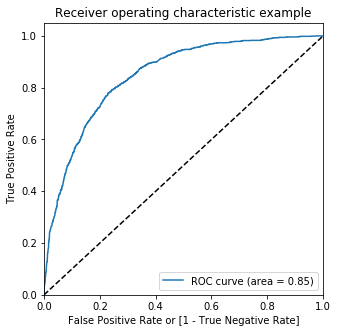

In [50]:
# Function to draw ROC Curve
def draw_roc( actual, probs ):
    # Calculating False Positive Rate, True Positive Rate and Threshold
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    #Computing AUC score
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
- Bigger the Area Under Curve(AUC) more accurate is the test

Lets find the Optimal Threshold value

## 12: Finding Optimal Threshold Value

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [51]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.282193,0,1,1,1,0,0,0,0,0,0,0
1,0,0.268192,0,1,1,1,0,0,0,0,0,0,0
2,1,0.689531,1,1,1,1,1,1,1,1,0,0,0
3,1,0.534214,1,1,1,1,1,1,1,0,0,0,0
4,1,0.674332,1,1,1,1,1,1,1,1,0,0,0


In [52]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.619667  0.946387  0.503989
0.2   0.2  0.722674  0.850039  0.677579
0.3   0.3  0.771434  0.780109  0.768363
0.4   0.4  0.795002  0.671329  0.838790
0.5   0.5  0.804754  0.537685  0.899312
0.6   0.6  0.800284  0.385392  0.947180
0.7   0.7  0.779764  0.205128  0.983219
0.8   0.8  0.749289  0.050505  0.996699
0.9   0.9  0.738521  0.000000  1.000000


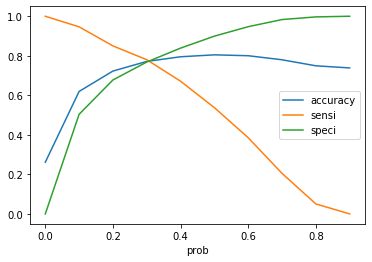

In [53]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**Observation:** From the graph we can see that 0.3 could be the optimal threshold value for us. Lets predict the results using 0.3 as threshold

In [54]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.282193,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.268192,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.689531,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.534214,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.674332,1,1,1,1,1,1,1,1,0,0,0,1


In [55]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion

array([[2793,  842],
       [ 283, 1004]], dtype=int64)

In [56]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's check the overall accuracy.
print('Accuracy:',metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity:',TP/float(TP+FN))
# Let us calculate specificity
print('Specificity:',TN/float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('False Positive Rate:',FP/float(TN+FP))
# Positive Predictive Value Calculation
print('Positive Predictive Value:',TP/float(TP+FP))
# Negative Predictive Value Calculation
print('Negative Predictive Value:',TN/float(TN+ FN))

Accuracy: 0.771434376269809
Sensitivity: 0.7801087801087802
Specificity: 0.768363136176066
False Positive Rate: 0.23163686382393398
Positive Predictive Value: 0.5438786565547129
Negative Predictive Value: 0.907997399219766


**Observation:** Now we have improved better Sensitivity and Specificity. Lets now explore Precision - Recall metrics as well

## 13: Precision and Recall

In [57]:
from sklearn.metrics import precision_score, recall_score
print('Precision:',precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print('Recall:',recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

Precision: 0.6540642722117203
Recall: 0.5376845376845377


Similar to Sensitivity and Specificity, there will also be a trade-off between precision and recall. Ideally we want both to be higher. Lets check the Precision-Recall Curve

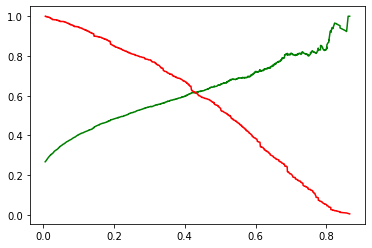

In [58]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**Observation:** As per precision-recall curve the threshold is little over 0.4. We can choose either choose Sensitivity-Specificity metrics or Precision-Recall metrics depending on what business better understands. Lets stick with threshold of 0.3 given by Sensitivity-Specificity metrics and proceed further.

## 14: Making predictions on the test set

In [59]:
# Retaining only variables left after feature elimination in train dataset
X_test = X_test[col]

# Adding constant to the Test Model
X_test_sm = sm.add_constant(X_test)

In [60]:
# Making predictions on test set
y_test_pred = res.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_pred_final.head()

,Churn,Churn_Prob,final_predicted
942,0,0.397413,0
3730,1,0.270295,0
1761,0,0.010238,0
2283,1,0.612692,1
1872,0,0.015869,0


## 15: Model Evaluation

In [61]:
# Let's take a look at the confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion

array([[1294,  234],
       [ 223,  359]], dtype=int64)

In [62]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's check the overall accuracy.
print('Accuracy:',metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity:',TP/float(TP+FN))
# Let us calculate specificity
print('Specificity:',TN/float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('False Positive Rate:',FP/float(TN+FP))
# Positive Predictive Value Calculation
print('Positive Predictive Value:',TP/float(TP+FP))
# Negative Predictive Value Calculation
print('Negative Predictive Value:',TN/float(TN+ FN))

Accuracy: 0.7834123222748816
Sensitivity: 0.6168384879725086
Specificity: 0.8468586387434555
False Positive Rate: 0.1531413612565445
Positive Predictive Value: 0.6053962900505903
Negative Predictive Value: 0.8529993408042189


**Conclusion:** We now have a good model that predicts customer churn with 78% accuracy, ~62% Sensitivity and ~85% Specificity.

For now I built the model by striking a balance between sensitivity and specificity. However, if marketing teams of the telecom company wants to identify most of those people who will churn so that they can try to give them some offer and retain them at the same time they can afford to spend some more money in giving offer to those false positives then we can consider sensitivity / recall as measure and try to improve them.